# Matrix Factorization (MF) Example
Demonstrates matrix factorization with MXNet on the [MovieLens 100k](http://grouplens.org/datasets/movielens/100k/) dataset. 

> **MovieLens 100k**
>
> Stable benchmark dataset. 100,000 ratings from 1000 users on 1700 movies. Released 4/1998.

You need to have python package pandas and bokeh installed (pip install pandas bokeh).

In [1]:
import mxnet as mx
from movielens_data import get_data_iter, max_id,load_mldata_iter
from matrix_fact import train
import matplotlib.pyplot as plt

/home/ec2-user/anaconda3/envs/mxnet_p27/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


In [2]:
# If MXNet is not compiled with GPU support (e.g. on OSX), set to [mx.cpu(0)]
# Can be changed to [mx.gpu(0), mx.gpu(1), ..., mx.gpu(N-1)] if there are N GPUs
ctx = mx.cpu() #[mx.gpu(0)]

In [3]:
train_test_data = get_data_iter(batch_size=50)
max_user, max_item = max_id('./ml-100k/u.data')
(max_user, max_item)

./ml-100k/u1.base
(80000L,)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
<NDArray 9 @cpu(0)>

[  2.   3.   4.   5.   7.   8.   9.  11.  13.]
<NDArray 9 @cpu(0)>

[ 3.  4.  3.  3.  4.  1.  5.  2.  5.]
<NDArray 9 @cpu(0)>
./ml-100k/u1.test
(20000L,)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
<NDArray 9 @cpu(0)>

[ 10.  12.  14.  17.  20.  23.  24.  27.  31.]
<NDArray 9 @cpu(0)>

[ 3.  5.  5.  3.  4.  4.  3.  2.  3.]
<NDArray 9 @cpu(0)>


(944, 1683)

## Linear MF

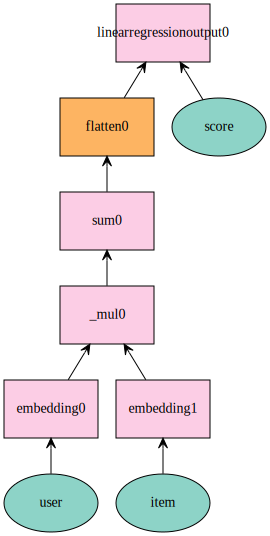

In [4]:
def plain_net(k):
    # input
    user = mx.symbol.Variable('user')
    item = mx.symbol.Variable('item')
    score = mx.symbol.Variable('score')
    # user feature lookup
    user = mx.symbol.Embedding(data = user, input_dim = max_user, output_dim = k) 
    # item feature lookup
    item = mx.symbol.Embedding(data = item, input_dim = max_item, output_dim = k)
    # predict by the inner product, which is elementwise product and then sum
    pred = user * item
    pred = mx.symbol.sum(data = pred, axis = 1)
    pred = mx.symbol.Flatten(data = pred)
    # loss layer
    pred = mx.symbol.LinearRegressionOutput(data = pred, label = score)
    return pred

net1 = plain_net(64)
mx.viz.plot_network(net1)

In [5]:
results1 = train(net1, train_test_data, num_epoch=15, learning_rate=0.02, ctx=ctx)

matrix_fact.py:56: DeprecationWarning: mxnet.model.FeedForward has been deprecated. Please use mxnet.mod.Module instead.
  **opt_args
/home/ec2-user/anaconda3/envs/mxnet_p27/lib/python2.7/site-packages/mxnet/model.py:547: DeprecationWarning: Calling initializer with init(str, NDArray) has been deprecated.please use init(mx.init.InitDesc(...), NDArray) instead.
  self.initializer(k, v)
INFO:root:Start training with [cpu(0)]
INFO:root:Epoch[0] Batch [500]	Speed: 41885.24 samples/sec	RMSE=3.707711
INFO:root:Epoch[0] Batch [1000]	Speed: 41271.76 samples/sec	RMSE=3.691665
INFO:root:Epoch[0] Batch [1500]	Speed: 41905.17 samples/sec	RMSE=3.700043
INFO:root:Epoch[0] Resetting Data Iterator
INFO:root:Epoch[0] Time cost=1.936
INFO:root:Epoch[0] Validation-RMSE=3.716242
INFO:root:Epoch[1] Batch [500]	Speed: 41932.39 samples/sec	RMSE=3.707380
INFO:root:Epoch[1] Batch [1000]	Speed: 40428.29 samples/sec	RMSE=3.690592
INFO:root:Epoch[1] Batch [1500]	Speed: 41389.01 samples/sec	RMSE=3.696399
INFO:root

In [ ]:
plt.plot(results1)
plt.ylabel('RMSE')
plt.xlabel('iterations (per 500 mini-batch)')
plt.title("RMSE History of Liner MF")
plt.show()

## Neural Network (non-linear) MF

In [ ]:
def get_one_layer_mlp(hidden, k):
    # input
    user = mx.symbol.Variable('user')
    item = mx.symbol.Variable('item')
    score = mx.symbol.Variable('score')
    # user latent features
    user = mx.symbol.Embedding(data = user, input_dim = max_user, output_dim = k)
    user = mx.symbol.Activation(data = user, act_type='relu')
    user = mx.symbol.FullyConnected(data = user, num_hidden = hidden)
    # item latent features
    item = mx.symbol.Embedding(data = item, input_dim = max_item, output_dim = k)
    item = mx.symbol.Activation(data = item, act_type='relu')
    item = mx.symbol.FullyConnected(data = item, num_hidden = hidden)
    # predict by the inner product
    pred = user * item
    pred = mx.symbol.sum(data = pred, axis = 1)
    pred = mx.symbol.Flatten(data = pred)
    # loss layer
    pred = mx.symbol.LinearRegressionOutput(data = pred, label = score)
    return pred

net2 = get_one_layer_mlp(64, 64)
mx.viz.plot_network(net2)

In [ ]:
results2 = train(net2, train_test_data, num_epoch=15, learning_rate=0.02, ctx=ctx)

In [ ]:
plt.plot(results1,'r',label='Linear MF')
plt.plot(results2,'b',label='Non-Linear MF')

plt.ylabel('RMSE')
plt.xlabel('iterations (per 500 mini-batch)')
plt.title("RMSE History")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Acknowledgement

This tutorial is based on examples from [xlvector/github](https://github.com/xlvector/).

In [ ]:
# What if we let the linear model train for a longer time?
results3 = train(net1, train_test_data, num_epoch=30, learning_rate=0.02, ctx=ctx)

## Next steps
See [this notebook](demo1-MF2-fancy.ipynb) to try using fancier network structures and optimizers on this same problem.

In [ ]:
plt.plot(results1,'r',label='Linear MF')
plt.plot(results2,'b',label='Non-Linear MF')
plt.plot(results3,'g',label='Linear MF with 30 epoch')

plt.ylabel('RMSE')
plt.xlabel('iterations (per 500 mini-batch)')
plt.title("RMSE History")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()